
# Docente : Josef Rodriguez  
# Masterclass Definitiva: Análisis Exploratorio de Datos (EDA)  
## Caso Real: Postulantes UNI (2021-1 a 2024-1)  
### Notebook paso a paso (teoría + ejemplos con números + gráficos + industria)

---

## Objetivo

Aplicar un EDA profesional a un dataset real del concurso de admisión UNI,
siguiendo la estructura:

**Definición real → Fórmula → Detalle → Ejemplo simple → Ejemplo industrial → Importancia → Código + gráfico → Conclusión**


# 1️ Definición Real

EDA (*Exploratory Data Analysis*) es el proceso sistemático de analizar datos
para comprender su estructura, calidad, patrones y relaciones antes del modelado.

---

# 2️ Fórmulas Clave

### Media

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

### Varianza

$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

### Proporción

$$
p = \frac{\text{casos favorables}}{\text{total}}
$$

---

# 3️ Detalle (¿Por qué es necesario?)

Antes de entrenar un modelo debemos:

- Validar calidad de datos  
- Detectar valores faltantes  
- Analizar distribuciones  
- Identificar outliers  
- Comprender relaciones entre variables  

---

# 4️ Ejemplo Simple

Si queremos analizar postulantes:

- ¿Cuántos postulan por carrera?  
- ¿Cuál es la nota promedio?  
- ¿Qué proporción ingresa?  

---

# 5️ Ejemplo Industrial

Universidades pueden:

- Optimizar vacantes  
- Analizar perfil demográfico  
- Detectar brechas regionales  
- Modelar probabilidad de ingreso  

---

# 6️ Importancia

Un modelo sin EDA es un modelo entrenado a ciegas.
EDA transforma datos en conocimiento antes de aplicar algoritmos.

In [1]:
# ============================
# IMPORTS Y CARGA DATASET (DESDE GITHUB)
# ============================

# pandas: manejo de datos tabulares (DataFrame)
import pandas as pd

# numpy: utilidades numéricas (NaN, cálculos, vectores)
import numpy as np

# matplotlib: gráficos para EDA
import matplotlib.pyplot as plt


# URL "RAW" de GitHub:
# - "raw.githubusercontent.com" entrega el archivo tal cual (sin HTML de GitHub)
# - Esto permite que pd.read_csv lo lea directamente desde Internet
DATA_URL = (
    "https://raw.githubusercontent.com/"
    "josefrodrim/ML-course/main/data/Datos_abiertos_admision_2021_1_2024_1.csv"
)

# Leemos el CSV desde la URL y lo cargamos como DataFrame
df = pd.read_csv(DATA_URL)

# Mostramos las primeras filas para validar que se cargó correctamente
df.head()


,IDHASH,COLEGIO,COLEGIO_DEPA,COLEGIO_PROV,COLEGIO_DIST,COLEGIO_PAIS,COLEGIO_ANIO_EGRESO,ESPECIALIDAD,ANIO_POSTULA,CICLO_POSTULA,...,DOMICILIO_DIST,ANIO_NACIMIENTO,NACIMIENTO_PAIS,NACIMIENTO_DEPA,NACIMIENTO_PROV,NACIMIENTO_DIST,SEXO,CALIF_FINAL,INGRESO,MODALIDAD
0,E4287C2FE19F63C5E6641955147E36684A5A2FF8064676...,LA DIVINA PROVIDENCIA,LIMA,LIMA,SURQUILLO,PERÚ,2020,INGENIERÍA DE SISTEMAS,2021,1,...,SAN JUAN DE MIRAFLORES,2004,PERÚ,LIMA,LIMA,VILLA EL SALVADOR,MASCULINO,3.11,NO,EXTRAORDINARIO1 - DEPORTISTAS CALIFICADOS DE A...
1,2DC37F0B9727B6591EC72D7A942647797A200F45D47C9E...,86019 LA LIBERTAD,ÁNCASH,HUARAZ,HUARAZ,PERÚ,2017,INGENIERÍA DE TELECOMUNICACIONES,2021,1,...,HUARAZ,2001,PERÚ,ÁNCASH,HUARAZ,HUARAZ,FEMENINO,3.58,NO,ORDINARIO
2,3B8677B90781D7BB8F2F967C05FA2DBBE153BBB682DF05...,0113 DANIEL ALOMIAS ROBLES,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PERÚ,2016,INGENIERÍA MECÁNICA,2021,1,...,SAN JUAN DE LURIGANCHO,2000,PERÚ,LIMA,LIMA,JESÚS MARÍA,MASCULINO,8.04,NO,ORDINARIO
3,FA366704D9E9F6FB5E5F55C1FB0CEEE973C626A5616F55...,SEBASTIAN SALAZAR BONDY,LIMA,LIMA,SANTA ANITA,PERÚ,2018,INGENIERÍA ELECTRÓNICA,2021,1,...,SANTA ANITA,2002,PERÚ,LIMA,LIMA,LIMA,MASCULINO,10.82,NO,EXTRAORDINARIO2 – INGRESO DIRECTO CEPRE
4,E31CF8F30F3AE60B3D8A14F6E1020E9AD26EE975F0823B...,TRILCE LOS OLIVOS,LIMA,LIMA,SAN MARTÍN DE PORRES,PERÚ,2020,ARQUITECTURA,2021,1,...,INDEPENDENCIA,2004,PERÚ,LIMA,LIMA,COMAS,FEMENINO,6.21,NO,ORDINARIO


In [2]:
# ============================
# CHECKLIST INDUSTRIAL – CALIDAD DE DATOS
# ============================

# 1️ Dimensión del dataset
n_rows, n_cols = df.shape
print(f"Dimensión del dataset: {n_rows} filas x {n_cols} columnas")


# 2️ Registros duplicados
duplicates = df.duplicated().sum()
print(f"Registros duplicados: {duplicates}")

if duplicates > 0:
    print("⚠️ Se recomienda revisar y decidir si eliminar duplicados.")


# 3️ Tipos de datos
print("\nTipos de datos por columna:")
print(df.dtypes.value_counts())


# 4️ Resumen estructural del dataset
print("\nResumen estructural:")
df.info()


# 5️ Porcentaje global de valores faltantes
missing_global = df.isna().mean().mean() * 100
print(f"\nPorcentaje promedio de valores faltantes en el dataset: {missing_global:.2f}%")


Dimensión del dataset: 42516 filas x 22 columnas
Registros duplicados: 0

Tipos de datos por columna:
str        17
int64       4
float64     1
Name: count, dtype: int64

Resumen estructural:
<class 'pandas.DataFrame'>
RangeIndex: 42516 entries, 0 to 42515
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IDHASH               42516 non-null  str    
 1   COLEGIO              42516 non-null  str    
 2   COLEGIO_DEPA         42290 non-null  str    
 3   COLEGIO_PROV         42288 non-null  str    
 4   COLEGIO_DIST         42288 non-null  str    
 5   COLEGIO_PAIS         18942 non-null  str    
 6   COLEGIO_ANIO_EGRESO  42516 non-null  int64  
 7   ESPECIALIDAD         42461 non-null  str    
 8   ANIO_POSTULA         42516 non-null  int64  
 9   CICLO_POSTULA        42516 non-null  int64  
 10  DOMICILIO_DEPA       42516 non-null  str    
 11  DOMICILIO_PROV       42516 non-null  str    
 12  DOMIC

In [3]:

# ============================
# ANÁLISIS PROFESIONAL DE MISSING VALUES
# ============================

# 1️ Cálculo de valores faltantes (conteo y porcentaje)
missing_count = df.isna().sum()
missing_pct = (df.isna().mean() * 100)

# 2️ Construimos tabla resumen
missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
})

# 3️ Filtramos solo columnas con NA
missing_table = missing_table[missing_table["missing_count"] > 0]

# 4️ Ordenamos por mayor porcentaje
missing_table = missing_table.sort_values("missing_pct", ascending=False)

print(f"Columnas con valores faltantes: {missing_table.shape[0]}")
missing_table.head(15)


Columnas con valores faltantes: 9


,missing_count,missing_pct
COLEGIO_PAIS,23574,55.447361
COLEGIO_PROV,228,0.536269
COLEGIO_DIST,228,0.536269
COLEGIO_DEPA,226,0.531565
NACIMIENTO_DIST,203,0.477467
NACIMIENTO_DEPA,202,0.475115
NACIMIENTO_PROV,202,0.475115
ESPECIALIDAD,55,0.129363
CALIF_FINAL,24,0.056449


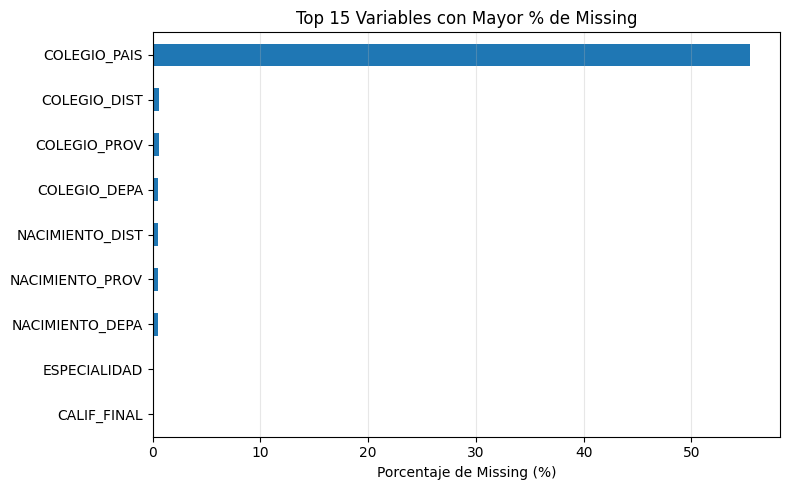

In [4]:

# Gráfico solo si existen columnas con NA
if missing_table.shape[0] > 0:
    
    plt.figure(figsize=(8,5))
    
    missing_table.head(15)["missing_pct"].sort_values().plot(kind="barh")
    
    plt.title("Top 15 Variables con Mayor % de Missing")
    plt.xlabel("Porcentaje de Missing (%)")
    plt.grid(axis="x", alpha=0.3)
    
    plt.tight_layout()
    plt.show()

else:
    print("No se detectaron valores faltantes en el dataset.")


Cantidad de observaciones válidas: 42492
Media: 7.64
Mediana: 7.29
Desviación estándar: 3.56


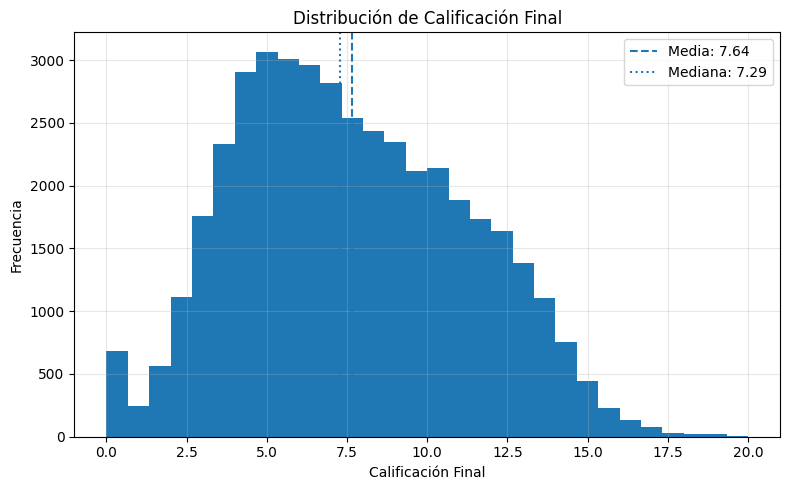

In [5]:
# ============================
# DISTRIBUCIÓN DE CALIF_FINAL 
# ============================

if "CALIF_FINAL" in df.columns:
    
    # 1️ Convertimos a numérico por seguridad
    df["CALIF_FINAL"] = pd.to_numeric(df["CALIF_FINAL"], errors="coerce")
    
    # 2️ Eliminamos valores faltantes
    nota_clean = df["CALIF_FINAL"].dropna()
    
    # 3️ Estadísticos descriptivos
    mean_nota = nota_clean.mean()
    median_nota = nota_clean.median()
    std_nota = nota_clean.std()
    
    print(f"Cantidad de observaciones válidas: {len(nota_clean)}")
    print(f"Media: {mean_nota:.2f}")
    print(f"Mediana: {median_nota:.2f}")
    print(f"Desviación estándar: {std_nota:.2f}")
    
    # 4️ Histograma
    plt.figure(figsize=(8,5))
    
    plt.hist(nota_clean, bins=30)
    
    plt.axvline(mean_nota, linestyle="--", label=f"Media: {mean_nota:.2f}")
    plt.axvline(median_nota, linestyle=":", label=f"Mediana: {median_nota:.2f}")
    
    plt.title("Distribución de Calificación Final")
    plt.xlabel("Calificación Final")
    plt.ylabel("Frecuencia")
    plt.grid(alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

else:
    print("La columna 'CALIF_FINAL' no existe en el dataset.")

Promedio nota ingresantes: 12.695953167648327
Promedio nota no ingresantes: 6.650595902169936


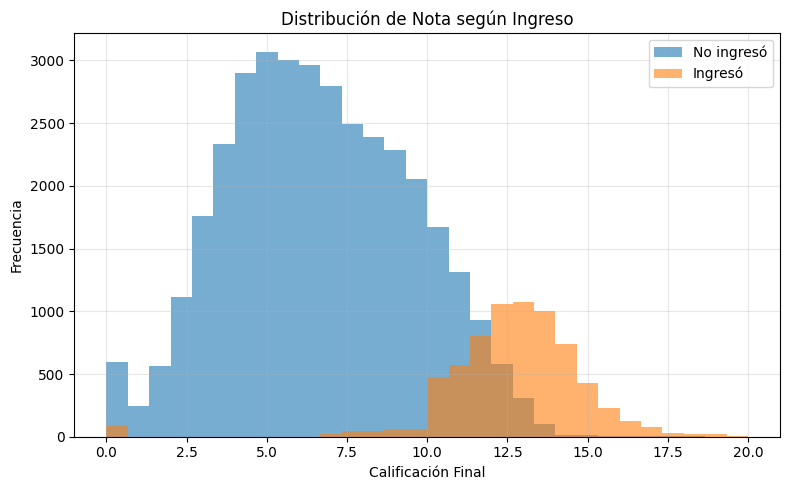

In [6]:

# ============================
# CALIFICACIÓN VS INGRESO
# ============================

if "INGRESO" in df.columns:
    
    df["INGRESO"] = df["INGRESO"].astype(str)
    
    ingreso_yes = df[df["INGRESO"].str.upper().str.contains("SI", na=False)]["CALIF_FINAL"]
    ingreso_no  = df[~df["INGRESO"].str.upper().str.contains("SI", na=False)]["CALIF_FINAL"]
    
    print("Promedio nota ingresantes:", ingreso_yes.mean())
    print("Promedio nota no ingresantes:", ingreso_no.mean())
    
    plt.figure(figsize=(8,5))
    
    plt.hist(ingreso_no.dropna(), bins=30, alpha=0.6, label="No ingresó")
    plt.hist(ingreso_yes.dropna(), bins=30, alpha=0.6, label="Ingresó")
    
    plt.title("Distribución de Nota según Ingreso")
    plt.xlabel("Calificación Final")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()


,Postulantes,Porcentaje (%)
ESPECIALIDAD,,
INGENIERÍA CIVIL,7608,17.89
INGENIERÍA DE SISTEMAS,6334,14.90
ARQUITECTURA,4713,11.09
INGENIERÍA MECATRÓNICA,3701,8.70
INGENIERÍA INDUSTRIAL,3667,8.62
INGENIERÍA DE MINAS,1529,3.60
INGENIERÍA ECONÓMICA,1523,3.58
INGENIERÍA ELECTRÓNICA,1472,3.46
INGENIERÍA MECÁNICA,1412,3.32


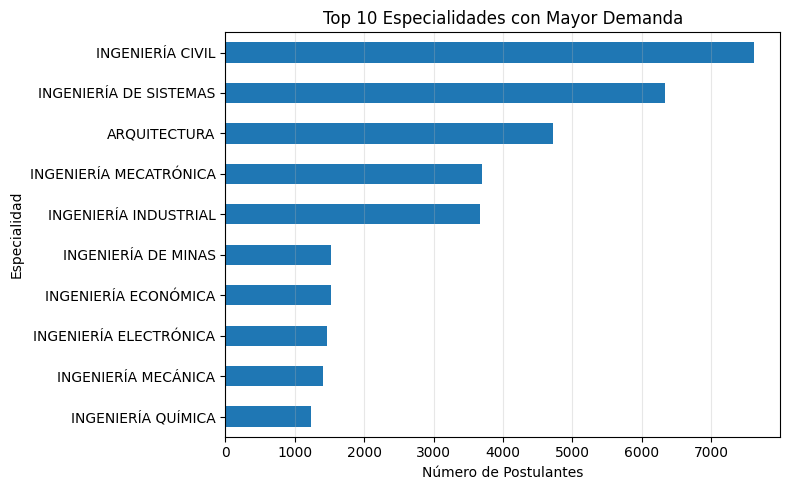

In [7]:

# ============================
# TOP 10 ESPECIALIDADES 
# ============================

if "ESPECIALIDAD" in df.columns:
    
    # 1️ Limpieza básica (quitamos espacios innecesarios)
    df["ESPECIALIDAD"] = df["ESPECIALIDAD"].astype(str).str.strip()
    
    # 2️ Conteo absoluto
    top_especialidades = df["ESPECIALIDAD"].value_counts().head(10)
    
    # 3️ Porcentaje relativo
    top_pct = (top_especialidades / len(df) * 100).round(2)
    
    # 4️ Tabla resumen
    resumen = pd.DataFrame({
        "Postulantes": top_especialidades,
        "Porcentaje (%)": top_pct
    })
    
    display(resumen)
    
    # 5️ Gráfico profesional
    plt.figure(figsize=(8,5))
    
    top_especialidades.sort_values().plot(kind="barh")
    
    plt.title("Top 10 Especialidades con Mayor Demanda")
    plt.xlabel("Número de Postulantes")
    plt.ylabel("Especialidad")
    plt.grid(axis="x", alpha=0.3)
    
    plt.tight_layout()
    plt.show()

else:
    print("La columna 'ESPECIALIDAD' no existe en el dataset.")



# 🧨 Errores comunes en la industria (EDA Educativo)

## 1) No entender qué significa un NA
Puede significar “no aplica”, no necesariamente dato faltante.

## 2) Confundir correlación con causalidad
Que una variable esté correlacionada no implica causa.

## 3) Ignorar segmentación
Promedios globales pueden ocultar diferencias regionales o por carrera.

## 4) No validar tipo de dato
Notas pueden venir como texto.

## 5) No generar conclusiones accionables
EDA debe terminar en decisiones concretas.



#  Insights Iniciales del Dataset UNI

A partir del EDA realizado, podemos extraer los siguientes insights preliminares:

## 1️ Distribución de postulantes por especialidad
Algunas carreras concentran mayor demanda.  
Esto puede indicar:
- Alta percepción de empleabilidad.
- Mayor tradición académica.
- Mayor difusión en colegios.

## 2️ Proporción de ingreso
Si la tasa de ingreso es baja:
- Alta competencia.
- Capacidad limitada de vacantes.
- Posible filtro fuerte por puntaje.

## 3️ Distribución de notas
Si la distribución muestra asimetría:
- Puede haber efecto “cola derecha” (pocos puntajes muy altos).
- Puede ser necesario normalizar o analizar por modalidad.

## 4️ Análisis regional
Si ciertas regiones aportan más postulantes:
- Indica concentración geográfica de aspirantes.
- Puede evidenciar brechas regionales.

## 5️ Calidad de datos
Variables con alto porcentaje de NA requieren:
- Imputación.
- Creación de variable indicadora.
- Revisión de diccionario de datos.

---

⚠️ Estos insights son preliminares. Un análisis más profundo requiere segmentación adicional.



#  Tarea para los Alumnos – Análisis de Insights

##  Objetivo
Que el alumno aplique pensamiento analítico y profesional para extraer conclusiones del dataset.

---

## 🔍 Parte 1 – Insights Descriptivos

1. ¿Cuál es la carrera con mayor demanda?  
2. ¿Cuál es la tasa de ingreso global?  
3. ¿Existen diferencias significativas por sexo?  
4. ¿Hay diferencias regionales marcadas?  
5. ¿Cómo se comportan las notas por especialidad?  

---

##  Parte 2 – Análisis Avanzado

6. Construir tabla comparativa ingreso vs especialidad.
7. Calcular tasa de ingreso por región.
8. Detectar posibles outliers en notas.
9. Analizar tendencia por año o ciclo.
10. Formular 3 hipótesis basadas en datos.

---

##  Parte 3 – Nivel Profesional

Responder:

- ¿Qué decisiones podría tomar la UNI con esta información?
- ¿Qué variables usarías para predecir probabilidad de ingreso?
- ¿Qué riesgos de sesgo existen en el dataset?

---

 Entregar:
- Notebook con análisis
- Gráficos adicionales
- Conclusiones ejecutivas (mínimo 5 insights sólidos)



#  Conclusión

Hemos aplicado un EDA profesional al dataset de postulantes UNI:

1. Validamos calidad
2. Analizamos distribución de variables clave
3. Identificamos posibles problemas de datos
4. Generamos insights iniciales

El siguiente paso natural sería:

→ Modelar probabilidad de ingreso  
→ Analizar brechas regionales  
→ Construir modelo predictivo supervisado  
